# Lehmer 线性同余法随机数产生器

In [3]:
import numpy as np
import matplotlib.pyplot as plt
m = 2**31 - 1
a = 7**5
b = 0
q = m // a
r = m % a
N = int(2e7)

In [2]:
def lehmer(z):
    ret = a * (z % q) - r * (z // q)
    if ret >= 0:
        return ret
    return ret + m

In [4]:
ret = np.zeros(N)
seed = 97
last = seed
for i in range(N):
    last = lehmer(last)
    ret[i] = last / m

# 二维独立性作图

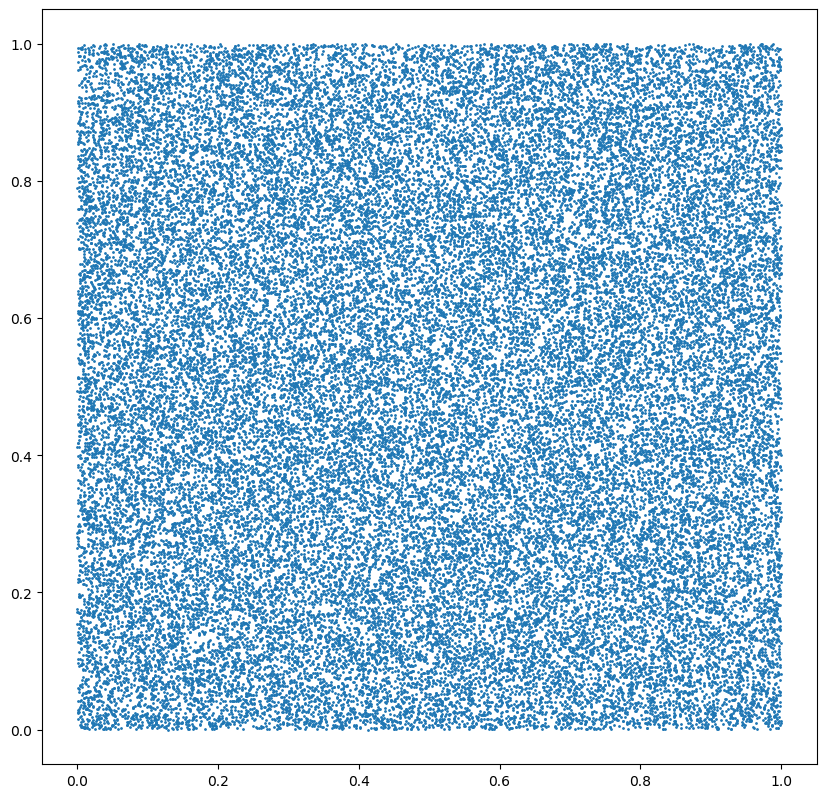

In [6]:
x = ret[:50000]
y = ret[1:50001]
f, ax = plt.subplots(1, 1, figsize=(10, 10), dpi=100)
plt.scatter(x, y, s=1)

# 均匀性检验-频率检验

## Compute$\chi^2$; its value should be close to K

In [7]:
K = 1000
mk = N / K
counts = np.zeros(K)
for r in ret:
    counts[int(r * K)] += 1

even = 0
for count in counts:
    even += (count - mk)**2 / mk

print(even)

937.9787999999991


# 均匀性检验
$<x^{k}>=\frac{1}{N} \sum_{1}^{N} x^{k}$ should be close to $\mathrm{m}_{k}=\int_{0}^{1} x^{k} d x=\frac{1}{k+1}$

In [11]:
k = 2
xks = []
for N in range(3, 8):
    xk = np.mean(np.power(ret[:int(2*10**N)], k))
    xks.append(xk)
    print(f'N={2*10**N}, abs(x^k - 1 / (k + 1))={np.abs(xk - 1 / (1 + k))}, and 1 / sqrt(N) = {1 / np.sqrt(2*10**N)}')


N=2000, abs(x^k - 1 / (k + 1))=0.00029068583278757387, and 1 / sqrt(N) = 0.022360679774997897
N=20000, abs(x^k - 1 / (k + 1))=0.000275485614991855, and 1 / sqrt(N) = 0.007071067811865475
N=200000, abs(x^k - 1 / (k + 1))=0.0006924664034877459, and 1 / sqrt(N) = 0.00223606797749979
N=2000000, abs(x^k - 1 / (k + 1))=0.0002077662170170136, and 1 / sqrt(N) = 0.0007071067811865475
N=20000000, abs(x^k - 1 / (k + 1))=7.805840682079124e-05, and 1 / sqrt(N) = 0.00022360679774997895


## 二维独立性
$c(l)=<x_ix_{i+1}>-<x>^2$

In [13]:
cl = np.mean(ret[:-1] * ret[1:]) - np.square(np.mean(ret[:-1]))
print(f'c(2)={cl}')

c(2)=1.1970006705830372e-05
